<a href="https://colab.research.google.com/github/SakshiJ11/numcpp/blob/main/Copy_of_ACL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1
import numpy as np
def fuzzy_union(A, B):
 """Perform fuzzy union (max) operation on two fuzzy sets."""
 return np.maximum(A, B)

def fuzzy_intersection(A, B):
 """Perform fuzzy intersection (min) operation on two fuzzy sets."""
 return np.minimum(A, B)

def fuzzy_complement(A):
 """Perform fuzzy complement operation on a fuzzy set."""
 return 1 - A

def max_min_composition(R, S):
 """Perform max-min composition on two fuzzy relations."""
 result = np.zeros((R.shape[0], S.shape[1]))
 for i in range(R.shape[0]):
  for j in range(S.shape[1]):
    result[i, j] = np.max(np.minimum(R[i, :], S[:, j]))
    return result

# Example usage
if __name__ == "__main__":

 # Define fuzzy sets
 A = np.array([0.2, 0.5, 0.8, 1.0])
 B = np.array([0.3, 0.6, 0.7, 0.9])
 print("Fuzzy Set A:", A)
 print("Fuzzy Set B:", B)

 # Perform fuzzy operations
 print("Union (A ∪ B):", fuzzy_union(A, B))
 print("Intersection (A ∩ B):", fuzzy_intersection(A, B))
 print("Complement of A:", fuzzy_complement(A))

 # Define fuzzy relations
 R = np.array([[0.2, 0.5, 0.1],
 [0.3, 0.8, 0.4],
 [0.7, 0.2, 0.6]])
 S = np.array([[0.6, 0.1],
 [0.2, 0.7],
 [0.9, 0.5]])
 print("\nFuzzy Relation R:")
 print(R)
 print("\nFuzzy Relation S:")
 print(S)

 # Perform max-min composition
 result = max_min_composition(R, S)
 print("\nMax-Min Composition (R ∘ S):")
 print(result)


Fuzzy Set A: [0.2 0.5 0.8 1. ]
Fuzzy Set B: [0.3 0.6 0.7 0.9]
Union (A ∪ B): [0.3 0.6 0.8 1. ]
Intersection (A ∩ B): [0.2 0.5 0.7 0.9]
Complement of A: [0.8 0.5 0.2 0. ]

Fuzzy Relation R:
[[0.2 0.5 0.1]
 [0.3 0.8 0.4]
 [0.7 0.2 0.6]]

Fuzzy Relation S:
[[0.6 0.1]
 [0.2 0.7]
 [0.9 0.5]]

Max-Min Composition (R ∘ S):
[[0.2 0. ]
 [0.  0. ]
 [0.  0. ]]


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.3 MB/s eta 0:00:00


In [ ]:
#2.Air conditioner
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Input variables
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')

# Output variable
ac_power = ctrl.Consequent(np.arange(0, 101, 1), 'ac_power')

# Membership functions for temperature
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [15, 22.5, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 40, 40])

# Membership functions for humidity
humidity['dry'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['normal'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['humid'] = fuzz.trimf(humidity.universe, [50, 100, 100])

# Membership functions for AC power
ac_power['low'] = fuzz.trimf(ac_power.universe, [0, 0, 50])
ac_power['medium'] = fuzz.trimf(ac_power.universe, [25, 50, 75])
ac_power['high'] = fuzz.trimf(ac_power.universe, [50, 100, 100])

# Fuzzy rules
rule1 = ctrl.Rule(temperature['cold'] & humidity['dry'], ac_power['low'])
rule2 = ctrl.Rule(temperature['cold'] & humidity['normal'], ac_power['low'])
rule3 = ctrl.Rule(temperature['cold'] & humidity['humid'], ac_power['medium'])
rule4 = ctrl.Rule(temperature['comfortable'] & humidity['dry'], ac_power['low'])
rule5 = ctrl.Rule(temperature['comfortable'] & humidity['normal'], ac_power['medium'])
rule6 = ctrl.Rule(temperature['comfortable'] & humidity['humid'], ac_power['medium'])
rule7 = ctrl.Rule(temperature['hot'] & humidity['dry'], ac_power['medium'])
rule8 = ctrl.Rule(temperature['hot'] & humidity['normal'], ac_power['high'])
rule9 = ctrl.Rule(temperature['hot'] & humidity['humid'], ac_power['high'])

# Create and simulate the fuzzy control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
ac_simulation = ctrl.ControlSystemSimulation(ac_ctrl)

# Function to get AC power based on temperature and humidity
def get_ac_power(temp, hum):
  ac_simulation.input['temperature'] = temp
  ac_simulation.input['humidity'] = hum
  ac_simulation.compute()
  return ac_simulation.output['ac_power']

# Example usage
if __name__ == "__main__":
  print("Air Conditioner Fuzzy Logic Controller")
while True:
  try:
    temp = float(input("Enter temperature (0-40°C): "))
    hum = float(input("Enter humidity (0-100%): "))
    if 0 <= temp <= 40 and 0 <= hum <= 100:
      power = get_ac_power(temp, hum)
      print(f"Recommended AC power: {power:.2f}%")
      break
    else:
      print("Invalid input. Please enter values within the specified ranges.")
      break
  except ValueError:
    print("Invalid input. Please enter numeric values.")
    break

print("Thank you for using the AC Fuzzy Logic Controller!")

Air Conditioner Fuzzy Logic Controller
Enter temperature (0-40°C): 34
Enter humidity (0-100%): 89
Recommended AC power: 81.43%
Thank you for using the AC Fuzzy Logic Controller!


In [ ]:
#3.Robotic arm
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Input variables
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
angle = ctrl.Antecedent(np.arange(-90, 91, 1), 'angle')

# Output variable
motor_speed = ctrl.Consequent(np.arange(-100, 101, 1), 'motor_speed')

# Membership functions for distance
distance['close'] = fuzz.trimf(distance.universe, [0, 0, 50])
distance['medium'] = fuzz.trimf(distance.universe, [0, 50, 100])
distance['far'] = fuzz.trimf(distance.universe, [50, 100, 100])

# Membership functions for angle
angle['negative'] = fuzz.trimf(angle.universe, [-90, -90, 0])
angle['zero'] = fuzz.trimf(angle.universe, [-45, 0, 45])
angle['positive'] = fuzz.trimf(angle.universe, [0, 90, 90])

# Membership functions for motor speed
motor_speed['fast_backward'] = fuzz.trimf(motor_speed.universe, [-100, -100, -50])
motor_speed['slow_backward'] = fuzz.trimf(motor_speed.universe, [-100, -50, 0])
motor_speed['stop'] = fuzz.trimf(motor_speed.universe, [-50, 0, 50])
motor_speed['slow_forward'] = fuzz.trimf(motor_speed.universe, [0, 50, 100])
motor_speed['fast_forward'] = fuzz.trimf(motor_speed.universe, [50, 100, 100])

# Fuzzy rules
rule1 = ctrl.Rule(distance['close'] & angle['negative'], motor_speed['slow_backward'])
rule2 = ctrl.Rule(distance['close'] & angle['zero'], motor_speed['stop'])
rule3 = ctrl.Rule(distance['close'] & angle['positive'], motor_speed['slow_forward'])
rule4 = ctrl.Rule(distance['medium'] & angle['negative'], motor_speed['slow_backward'])
rule5 = ctrl.Rule(distance['medium'] & angle['zero'], motor_speed['stop'])
rule6 = ctrl.Rule(distance['medium'] & angle['positive'], motor_speed['slow_forward'])
rule7 = ctrl.Rule(distance['far'] & angle['negative'], motor_speed['fast_backward'])
rule8 = ctrl.Rule(distance['far'] & angle['zero'], motor_speed['fast_forward'])
rule9 = ctrl.Rule(distance['far'] & angle['positive'], motor_speed['fast_forward'])

# Create and simulate the fuzzy control system
arm_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
arm_simulation = ctrl.ControlSystemSimulation(arm_ctrl)

def get_motor_speed(dist, ang):
    arm_simulation.input['distance'] = dist
    arm_simulation.input['angle'] = ang
    arm_simulation.compute()
    return arm_simulation.output['motor_speed']

class RoboticArm:
    def __init__(self, initial_angle=0):
        self.angle = initial_angle
        self.distance_to_target = 100  # Start with target at maximum distance

    def move(self, speed):
        # Simulate arm movement
        self.angle += speed * 0.1  # Adjust multiplier for desired sensitivity
        self.angle = max(-90, min(90, self.angle))  # Constrain angle between -90 and 90 degrees
        # Simulate change in distance to target
        self.distance_to_target -= abs(speed) * 0.2  # Adjust multiplier for desired sensitivity
        self.distance_to_target = max(0, self.distance_to_target)

    def is_target_reached(self):
        return self.distance_to_target < 5  # Consider target reached if distance is less than 5 units

# Simulation
if __name__ == "__main__":
    arm = RoboticArm()
    print("Robotic Arm Fuzzy Logic Controller Simulation")

    while not arm.is_target_reached():
        speed = get_motor_speed(arm.distance_to_target, arm.angle)
        arm.move(speed)
        print(f"Distance: {arm.distance_to_target:.2f}, Angle: {arm.angle:.2f}, Motor Speed: {speed:.2f}")

    print("\nTarget reached!")
    print(f"Final position - Distance: {arm.distance_to_target:.2f}, Angle: {arm.angle:.2f}")


Robotic Arm Fuzzy Logic Controller Simulation
Distance: 83.33, Angle: 8.33, Motor Speed: 83.33
Distance: 76.03, Angle: 11.99, Motor Speed: 36.54
Distance: 70.38, Angle: 14.81, Motor Speed: 28.25
Distance: 65.79, Angle: 17.11, Motor Speed: 22.95
Distance: 61.86, Angle: 19.07, Motor Speed: 19.64
Distance: 58.41, Angle: 20.79, Motor Speed: 17.24
Distance: 55.04, Angle: 22.48, Motor Speed: 16.84
Distance: 51.53, Angle: 24.24, Motor Speed: 17.58
Distance: 47.76, Angle: 26.12, Motor Speed: 18.82
Distance: 43.64, Angle: 28.18, Motor Speed: 20.62
Distance: 39.07, Angle: 30.47, Motor Speed: 22.84
Distance: 33.95, Angle: 33.02, Motor Speed: 25.59
Distance: 28.16, Angle: 35.92, Motor Speed: 28.98
Distance: 21.51, Angle: 39.24, Motor Speed: 33.21
Distance: 13.78, Angle: 43.11, Motor Speed: 38.66
Distance: 4.59, Angle: 47.70, Motor Speed: 45.96

Target reached!
Final position - Distance: 4.59, Angle: 47.70


Iteration 0: Best path length = 5.10
Iteration 10: Best path length = 4.30
Iteration 20: Best path length = 4.07
Iteration 30: Best path length = 3.99
Iteration 40: Best path length = 3.99
Iteration 50: Best path length = 3.99
Iteration 60: Best path length = 3.99
Iteration 70: Best path length = 3.99
Iteration 80: Best path length = 3.97
Iteration 90: Best path length = 3.97


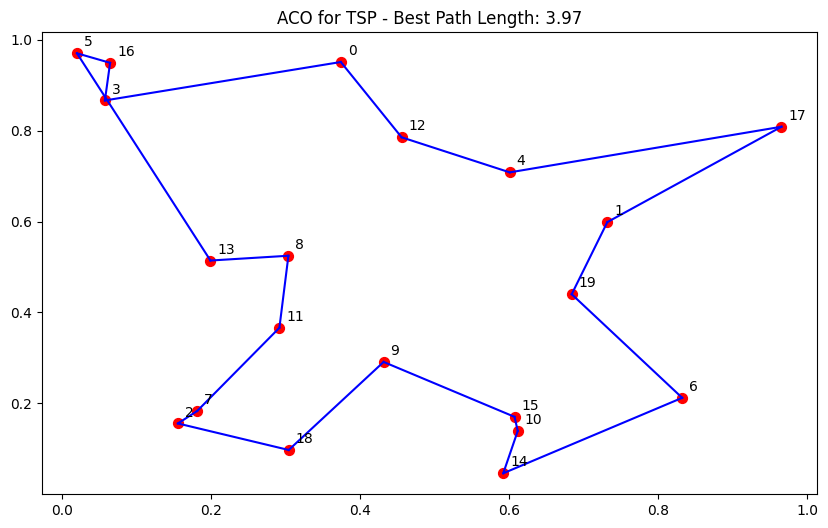


Optimization complete!
Best path: [4, 12, 0, 3, 16, 5, 13, 8, 11, 7, 2, 18, 9, 15, 10, 14, 6, 19, 1, 17]
Best path length: 3.97


In [ ]:
#4.ACO
import numpy as np
import matplotlib.pyplot as plt

class AntColonyOptimization:
    def __init__(self, distances, n_ants, n_iterations, alpha=1, beta=2, rho=0.5, Q=100):
        self.distances = distances
        self.n_cities = len(distances)
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha  # pheromone importance
        self.beta = beta  # distance importance
        self.rho = rho  # pheromone evaporation rate
        self.Q = Q  # pheromone deposit factor
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.best_path = None
        self.best_path_length = float('inf')

    def run(self):
        for iteration in range(self.n_iterations):
            paths = self.construct_paths()
            self.update_pheromone(paths)
            self.update_best_path(paths)
            if iteration % 10 == 0:
                print(f"Iteration {iteration}: Best path length = {self.best_path_length:.2f}")
        return self.best_path, self.best_path_length

    def construct_paths(self):
        paths = []
        for ant in range(self.n_ants):
            path = self.construct_path_for_ant()
            paths.append(path)
        return paths

    def construct_path_for_ant(self):
        unvisited = list(range(self.n_cities))
        start = np.random.choice(unvisited)
        path = [start]
        unvisited.remove(start)
        while unvisited:
            current = path[-1]
            probabilities = self.calculate_probabilities(current, unvisited)
            next_city = np.random.choice(unvisited, p=probabilities)
            path.append(next_city)
            unvisited.remove(next_city)
        return path

    def calculate_probabilities(self, current, unvisited):
        pheromone = np.array([self.pheromone[current][j] for j in unvisited])
        distance = np.array([self.distances[current][j] for j in unvisited])
        attractiveness = pheromone ** self.alpha * ((1.0 / distance) ** self.beta)
        probabilities = attractiveness / np.sum(attractiveness)
        return probabilities

    def update_pheromone(self, paths):
        self.pheromone *= (1 - self.rho)
        for path in paths:
            path_length = self.calculate_path_length(path)
            for i in range(self.n_cities):
                from_city, to_city = path[i], path[(i + 1) % self.n_cities]
                self.pheromone[from_city][to_city] += self.Q / path_length
                self.pheromone[to_city][from_city] += self.Q / path_length

    def update_best_path(self, paths):
        for path in paths:
            path_length = self.calculate_path_length(path)
            if path_length < self.best_path_length:
                self.best_path = path
                self.best_path_length = path_length

    def calculate_path_length(self, path):
        return sum(self.distances[path[i]][path[(i + 1) % self.n_cities]] for i in range(self.n_cities))


# Generate a random TSP instance
n_cities = 20
np.random.seed(42)
cities = np.random.rand(n_cities, 2)
distances = np.sqrt(((cities[:, np.newaxis, :] - cities[np.newaxis, :, :]) ** 2).sum(axis=2))

# Run ACO
aco = AntColonyOptimization(distances, n_ants=20, n_iterations=100)
best_path, best_path_length = aco.run()

# Visualize the result
plt.figure(figsize=(10, 6))
plt.scatter(cities[:, 0], cities[:, 1], c='red', s=50)
for i in range(n_cities):
    plt.annotate(str(i), (cities[i, 0], cities[i, 1]), xytext=(5, 5), textcoords='offset points')
for i in range(n_cities):
    j = (i + 1) % n_cities
    plt.plot([cities[best_path[i], 0], cities[best_path[j], 0]],
             [cities[best_path[i], 1], cities[best_path[j], 1]], 'b-')
plt.title(f"ACO for TSP - Best Path Length: {best_path_length:.2f}")
plt.show()

print("\nOptimization complete!")
print(f"Best path: {best_path}")
print(f"Best path length: {best_path_length:.2f}")


Iteration 0: Best score = 7.4169
Iteration 10: Best score = 7.2411
Iteration 20: Best score = 7.2411
Iteration 30: Best score = 7.2411
Iteration 40: Best score = 7.2411
Iteration 50: Best score = 7.2411
Iteration 60: Best score = 7.2411
Iteration 70: Best score = 7.2411
Iteration 80: Best score = 7.2411
Iteration 90: Best score = 7.2411


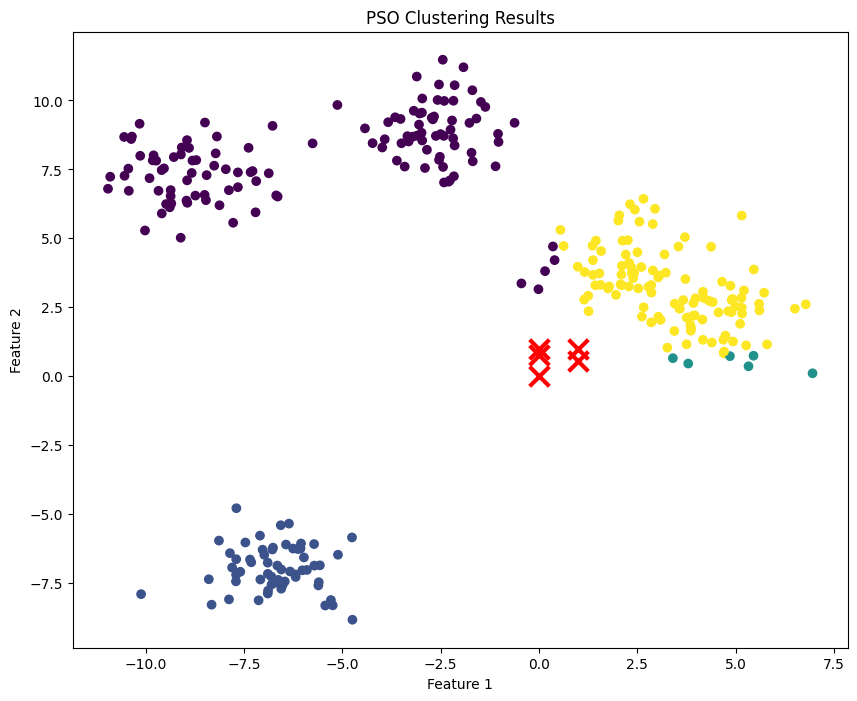


Clustering complete!
Final centroids:
[[0.         1.        ]
 [0.         0.        ]
 [1.         0.53842892]
 [0.         0.75056522]
 [1.         1.        ]]


In [ ]:
#5.PSO
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 5

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

class Particle:
    def __init__(self, n_clusters, n_features):
        self.position = np.random.rand(n_clusters, n_features)
        self.velocity = np.random.randn(n_clusters, n_features) * 0.1
        self.best_position = self.position.copy()
        self.best_score = float('inf')

def fitness(particle, X):
    distances = np.sqrt(((X[:, np.newaxis, :] - particle.position[np.newaxis, :, :]) ** 2).sum(axis=2))
    min_distances = distances.min(axis=1)
    return np.mean(min_distances)

def update_velocity(particle, global_best_position, w=0.5, c1=1, c2=1):
    r1, r2 = np.random.rand(2)
    cognitive = c1 * r1 * (particle.best_position - particle.position)
    social = c2 * r2 * (global_best_position - particle.position)
    particle.velocity = w * particle.velocity + cognitive + social

def update_position(particle):
    particle.position += particle.velocity
    particle.position = np.clip(particle.position, 0, 1)

def pso_clustering(X, n_clusters, n_particles=20, n_iterations=100):
    particles = [Particle(n_clusters, X.shape[1]) for _ in range(n_particles)]
    global_best_position = particles[0].position.copy()
    global_best_score = float('inf')

    for iteration in range(n_iterations):
        for particle in particles:
            score = fitness(particle, X)
            if score < particle.best_score:
                particle.best_score = score
                particle.best_position = particle.position.copy()

            if score < global_best_score:
                global_best_score = score
                global_best_position = particle.position.copy()

        for particle in particles:
            update_velocity(particle, global_best_position)
            update_position(particle)

        if iteration % 10 == 0:
            print(f"Iteration {iteration}: Best score = {global_best_score:.4f}")

    return global_best_position

# Run PSO clustering
best_centroids = pso_clustering(X, n_clusters)

# Assign points to clusters
distances = np.sqrt(((X[:, np.newaxis, :] - best_centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
cluster_assignments = distances.argmin(axis=1)

# Visualize results
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('PSO Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print("\nClustering complete!")
print(f"Final centroids:\n{best_centroids}")
